# Moving average model
Residual errors, which can be a useful source of information, themselves form a time series that can have temporal structure.
A simple autoregression model of this structure can be used to predict the forecast error, which
in turn can be used to correct forecasts. This type of model is called a moving average model

## Autoregression of Residual Error

In [61]:
import pandas as pd
from pandas import read_csv
from pandas import concat
from pandas import DataFrame
from statsmodels.tsa.ar_model import AutoReg
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from math import  sqrt

series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)

print(series.head())

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64


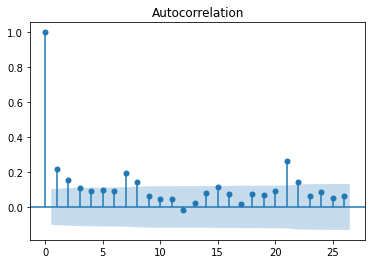

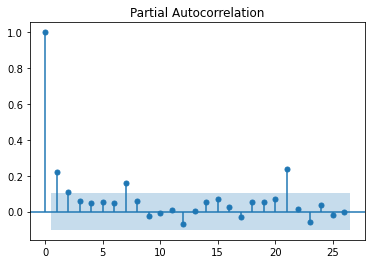

In [32]:
# Plotting ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(series)
plot_pacf(series)
plt.show()

We can see that there is a strong Partial autocorrelation in the lag order of 1
So, we will take the order of moving average as 1

In [33]:
# create lagged dataset
lag = 1
values = DataFrame(series.values)
dataframe = concat([values.shift(lag), values], axis=1)
dataframe.columns = ['t-1', 't']
dataframe.head()


,t-1,t
0,NaN,35
1,35.0,32
2,32.0,30
3,30.0,31
4,31.0,44


In [50]:
# train - test split
length = dataframe.shape[0]
train_size = int(length * 0.66)
X = dataframe.values
train, test = X[:train_size], X[train_size:]
train_X, train_y = train[:,0] , train[:,1]
test_X, test_y = test[:,0], test[:,1]


## Step 1: Create a residual dataset

First, we need to have a "residual errors dataset". In order to have that, first we need to create a model on the dataset, then collect the residual errors from that model's prediction. The model will use on the dataset will be a persistence model

In [51]:
#train_pred = [x for x in train_X]
residuals = [train_y[i]-train_X[i] for i in range(len(train_pred))]
# remove nan:
residuals = [x for x in residuals if str(x) != 'nan']

print(residuals)

[-3.0, -2.0, 1.0, 13.0, -15.0, 16.0, -2.0, -5.0, -11.0, 11.0, -5.0, 22.0, -8.0, -2.0, -8.0, 13.0, -7.0, -2.0, 11.0, -18.0, 19.0, -14.0, -7.0, 5.0, 6.0, -4.0, -4.0, 9.0, -6.0, -14.0, -1.0, 8.0, 13.0, -6.0, 12.0, -12.0, 13.0, -20.0, 0.0, 20.0, -15.0, 9.0, 6.0, -17.0, 18.0, -5.0, -2.0, 1.0, -7.0, 9.0, -11.0, -2.0, 17.0, -10.0, 3.0, -6.0, -2.0, -7.0, 5.0, -7.0, 17.0, -11.0, 2.0, 14.0, -6.0, -5.0, -7.0, 7.0, 6.0, -2.0, -4.0, -8.0, -4.0, 3.0, 12.0, 4.0, -5.0, -5.0, 9.0, 1.0, -3.0, -5.0, -4.0, 1.0, 21.0, -20.0, -4.0, 18.0, -9.0, -2.0, 2.0, 6.0, -13.0, 2.0, -3.0, 2.0, 3.0, 0.0, -4.0, 19.0, -19.0, 0.0, 4.0, -3.0, -3.0, 10.0, -8.0, 12.0, -16.0, 16.0, -1.0, 9.0, -20.0, 3.0, -2.0, 5.0, 2.0, 16.0, -7.0, -19.0, 3.0, 3.0, -5.0, 6.0, 8.0, -9.0, 14.0, -22.0, 4.0, 6.0, -5.0, 7.0, -1.0, 1.0, -4.0, -14.0, 10.0, 9.0, -7.0, 19.0, -14.0, 4.0, -4.0, -4.0, 6.0, -4.0, -6.0, 10.0, -3.0, -2.0, 7.0, 1.0, -12.0, 1.0, 13.0, 3.0, -15.0, -3.0, 13.0, -4.0, 6.0, -14.0, 7.0, -6.0, 5.0, -6.0, -4.0, 6.0, 4.0, -1.0, 6.0, -7

## Step 2: Autoregression of the residual dataset

In [52]:
len(test_X)

125

In [53]:
model = AutoReg(residuals, lags = lag)
model_fit = model.fit()
# collect params of the residual model
coef = model_fit.params
print('Coef: {}'.format(coef))
# predict the residuals
pred_residual = model_fit.predict(start=len(train_X), end=len(train_X) + len(test_X) +1)
print("Predict residuals:", pred_residual)

Coef: [ 0.05361949 -0.46023983]
Predict residuals: [ 0.24076237 -0.05718894  0.07994012  0.01682786  0.04587464  0.03250616
  0.03865886  0.03582714  0.03713041  0.0365306   0.03680666  0.0366796
  0.03673808  0.03671116  0.03672355  0.03671785  0.03672047  0.03671927
  0.03671982  0.03671957  0.03671968  0.03671963  0.03671966  0.03671964
  0.03671965  0.03671965  0.03671965  0.03671965  0.03671965  0.03671965
  0.03671965  0.03671965  0.03671965  0.03671965  0.03671965  0.03671965
  0.03671965  0.03671965  0.03671965  0.03671965  0.03671965  0.03671965
  0.03671965  0.03671965  0.03671965  0.03671965  0.03671965  0.03671965
  0.03671965  0.03671965  0.03671965  0.03671965  0.03671965  0.03671965
  0.03671965  0.03671965  0.03671965  0.03671965  0.03671965  0.03671965
  0.03671965  0.03671965  0.03671965  0.03671965  0.03671965  0.03671965
  0.03671965  0.03671965  0.03671965  0.03671965  0.03671965  0.03671965
  0.03671965  0.03671965  0.03671965  0.03671965  0.03671965  0.03671965
 

/home/xuantung/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


## Step 3: Walk forward prediction using the predicted residuals

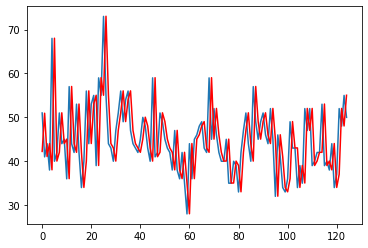

In [66]:
pred_y = []
for t in range(len(test)):
    predict = test_X[t] + pred_residual[t]
    pred_y.append(predict)

# plot predicted error
plt.plot(test_y)
plt.plot(pred_y, color='red')
plt.show()


In [64]:
print(test_y)

[51. 41. 44. 38. 68. 40. 42. 51. 44. 45. 36. 57. 44. 42. 53. 42. 34. 40.
 56. 44. 53. 55. 39. 59. 55. 73. 55. 44. 43. 40. 47. 51. 56. 49. 54. 56.
 47. 44. 43. 42. 45. 50. 48. 43. 40. 59. 41. 42. 51. 49. 45. 43. 42. 38.
 47. 38. 36. 42. 35. 28. 44. 36. 45. 46. 48. 49. 43. 42. 59. 45. 52. 46.
 42. 40. 40. 45. 35. 35. 40. 39. 33. 42. 47. 51. 44. 40. 57. 49. 45. 49.
 51. 46. 44. 52. 45. 32. 46. 41. 34. 33. 36. 49. 43. 43. 34. 39. 35. 52.
 47. 52. 39. 40. 42. 42. 53. 39. 40. 38. 44. 34. 37. 52. 48. 55. 50.]


In [65]:
print(pred_y)

[42.24076236823342, 50.94281105977779, 41.07994011975635, 44.01682786430739, 38.045874638116516, 68.03250615583495, 40.03865886386672, 42.035827142559334, 51.037130413496506, 44.036530596300075, 45.03680665606545, 36.03667960236557, 57.036738077538985, 44.03671116493503, 42.036723551187336, 53.03671785054066, 42.036720474205325, 34.03671926669034, 40.03671982243684, 56.03671956666016, 44.036719684378774, 53.03671963019998, 55.03671965513522, 39.03671964365903, 59.03671964894083, 55.03671964650994, 73.03671964762873, 55.03671964711382, 44.0367196473508, 43.03671964724173, 40.03671964729193, 47.036719647268825, 51.03671964727946, 56.036719647274566, 49.03671964727682, 54.03671964727578, 56.03671964727626, 47.03671964727604, 44.036719647276136, 43.036719647276094, 42.036719647276115, 45.03671964727611, 50.03671964727611, 48.03671964727611, 43.03671964727611, 40.03671964727611, 59.03671964727611, 41.03671964727611, 42.03671964727611, 51.03671964727611, 49.03671964727611, 45.03671964727611,